In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

tf.set_random_seed(1)
np.random.seed(1)

Using matplotlib backend: TkAgg


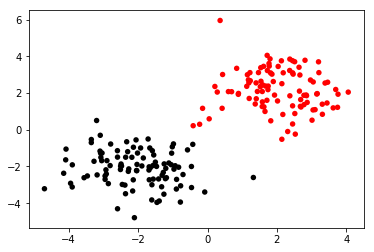

In [5]:
# fakedata
n_data = np.ones((100,2)) # 100 points
x0 = np.random.normal(2*n_data, 1)
y0 = np.zeros(100) # class 0 shape (100,)

x1 = np.random.normal(-2*n_data, 1)
y1 = np.ones(100)  # class 1 shape (100,)

x = np.vstack((x0, x1)) # shape (200, 2)
y = np.hstack((y0, y1)) # shape (200,)

# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, lw=0, cmap='flag')
plt.show()

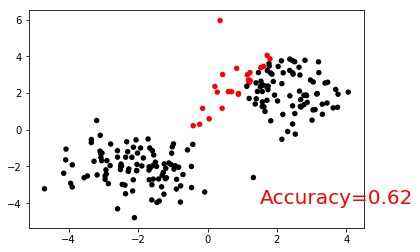

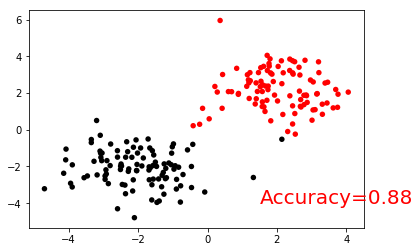

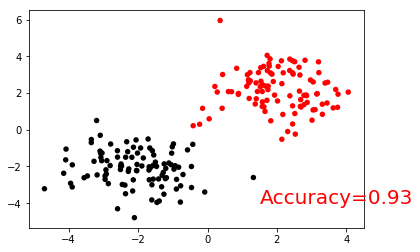

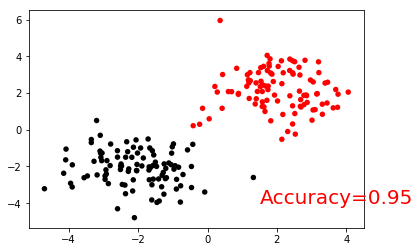

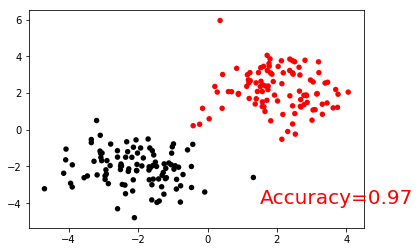

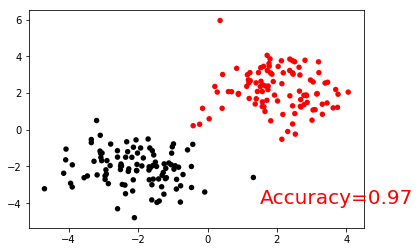

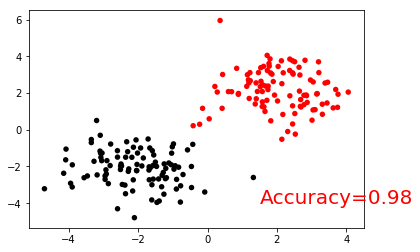

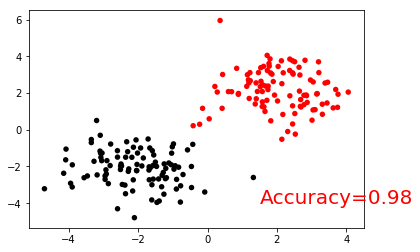

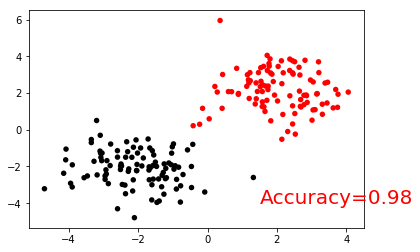

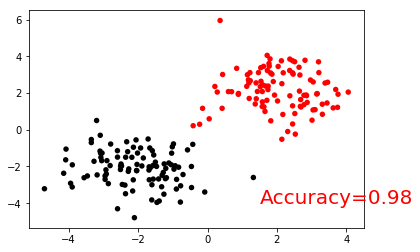

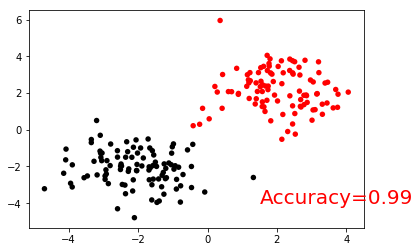

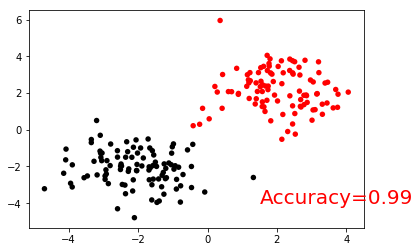

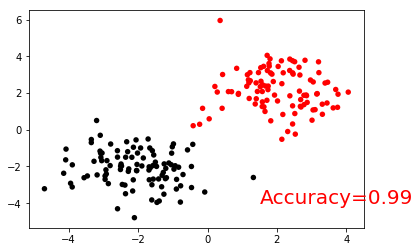

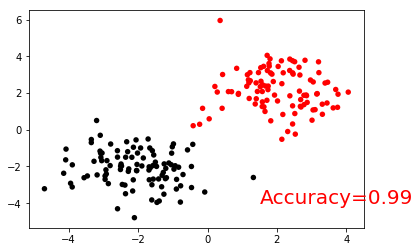

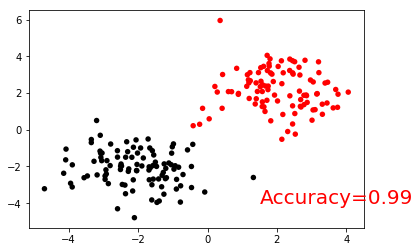

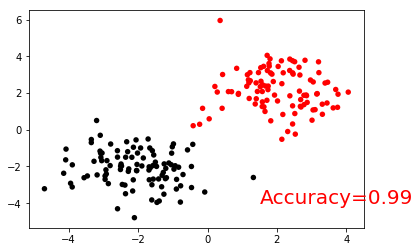

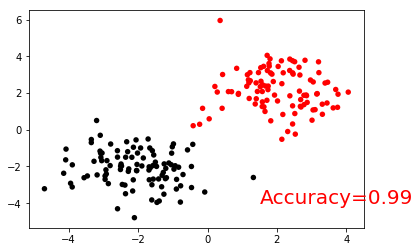

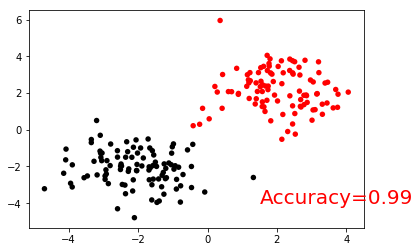

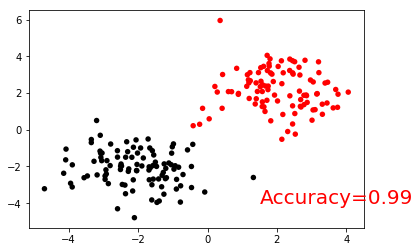

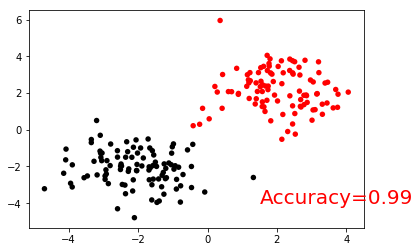

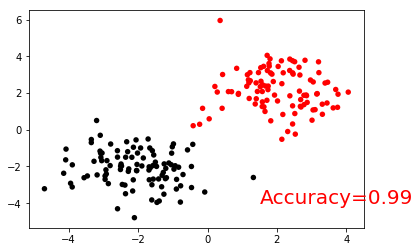

In [10]:

# classification
with tf.Graph().as_default(), tf.Session() as sess:
    tf_x = tf.placeholder(tf.float32, x.shape)
    tf_y = tf.placeholder(tf.int32, y.shape)
    # neural network layers
    l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
    output = tf.layers.dense(l1, 2) # binary classification
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)  # computer cost
    accuracy = tf.metrics.accuracy( # return (acc, update_op)
        labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1,))[1]
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
    train_op = optimizer.minimize(loss)
    
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    # plot
    plt.ion() # turn on interaction model
    for step in range(101):
        _, acc, pred = sess.run([train_op, accuracy, output], {tf_x:x, tf_y:y})
        if step%5==0:
            plt.cla() # clearn current axes
            plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=30, lw=0, cmap='flag')
            plt.text(1.5, -4, 'Accuracy=%.2f'%acc, fontdict={'size':20, 'color':'red'})
            plt.pause(0.1)
            
    plt.ioff()
    plt.show()